# Linear Discriminant Analysis (LDA)

The PCA encountered in the previous exercise can be viewed as a dimensionality reduction scheme, projecting onto the directions with maximal variance.

LDA is also a dimensionality reduction scheme but operates on a very different principle. Now we are given data that belongs to different classes. We are given both the data value $x$ and a class label $y$ If we have $k$ classes then $y$ will take on $k$ labels, in Python typicall the values 0 through $k-1$. 

The idea is to project the data onto a lower dimensional space in such a way that maximal *class separation* is achieved in the lower dimensional space.

You can learn more about the scikit-learn implementation at http://scikit-learn.org/stable/modules/generated/sklearn.lda.LDA.html

You will investigate the difference between  PCA using the wine data set, for more information see  http://archive.ics.uci.edu/ml/datasets/Wine Since the wine dataset is 13 dimensional the difference between PCA and LDA is more pronounced than say, with the Iris data set. 

We project down to 2 dimensions for easy visualization. In fact, since there are only 3 classes, one does not retain any more information by using higher dimensions.


## Import packages

In [6]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pylab as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Import different modules for using with the notebook
from IPython.display import display
from IPython.display import Image

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Simple example

As a warmup run the example from the scikit-learn website.

In [7]:
# Create synthetic data
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])

# Instantiate & fit the model: LDA
clf = LDA()
clf.fit(X, y)

print(clf.predict([[-0.8, -1]]))

[1]


## Loading the data

Read the data, extract the class labels from the last column, then extract the names of the classes using the convenient `set` function in Python. 


In [8]:
# import training data
wine_train = np.loadtxt('./data/wine/wine_train.txt',delimiter = ',')
wine_train_labels = wine_train[:,-1]
wine_train_classes = list(set(wine_train_labels))
wine_train_classes = np.array(wine_train_classes, dtype=int)
wine_train_labels = np.array(wine_train_labels, dtype = int)
wine_train = wine_train[:,:-1]

# import testing data
wine_test = np.loadtxt('./data/wine/wine_test.txt', delimiter = ',')
wine_test_labels = wine_test[:,-1]
wine_test_classes = list(set(wine_test_labels))
wine_test_classes = np.array(wine_test_classes, dtype=int)
wine_test_labels = np.array(wine_test_labels, dtype = int)
wine_test = wine_test[:, :-1]

---

## PCA

### Problem 1: (**5 marks**)

Project the data onto 2 PCA components and display the classes of the dimension-reduced data.

You should see something like:

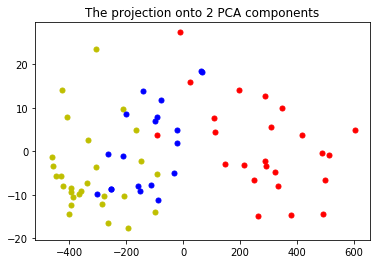

In [22]:
# Insert code to produce the image below
import pandas as pd

pca = PCA(n_components=2)
pca.fit(wine_train)

principalComponents = pca.transform(wine_test)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
labelsDf=pd.DataFrame(wine_test_labels, columns=['label']) 
finalDf = pd.concat([principalDf, labelsDf], axis = 1)

fig = plt.figure(figsize = (6,4))
ax = fig.add_subplot(1,1,1) 
colors = ['r', 'y', 'b']

for single_class, color in zip(wine_test_classes,colors):
    indicesToKeep = finalDf['label'] == single_class
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 25)
plt.title('The projection onto 2 PCA components')
ax.grid(False)

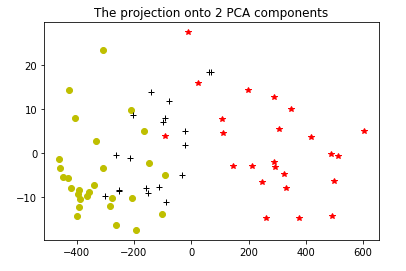

In [5]:
display(Image(filename='./Wine_PCA.png'))

## LDA

### Problem 2:(**5 marks**)

Fit an LDA model to the data, using 2 components and display the different classes of the projected data.

You should see: 

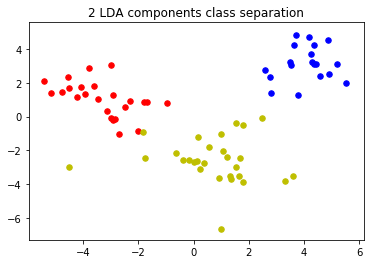

In [23]:
# Insert code to produce the image below


sklearn_lda = LDA(n_components=2)
sklearn_lda.fit(wine_train, wine_train_labels)
ldaComponents = sklearn_lda.transform(wine_test)

ldaDf = pd.DataFrame(data = ldaComponents, columns = ['lda component 1', 'lda component 2'])
labelsDf=pd.DataFrame(wine_test_labels, columns=['label']) 
finalDf = pd.concat([ldaDf, labelsDf], axis = 1)

fig = plt.figure(figsize = (6,4))
ax = fig.add_subplot(1,1,1) 
colors = ['r', 'y', 'b']

for single_class, color in zip(wine_test_classes,colors):
    indicesToKeep = finalDf['label'] == single_class
    ax.scatter(finalDf.loc[indicesToKeep, 'lda component 1']
               , finalDf.loc[indicesToKeep, 'lda component 2']
               , c = color
               , s = 30)
    
plt.title('2 LDA components class separation')
ax.grid(False)

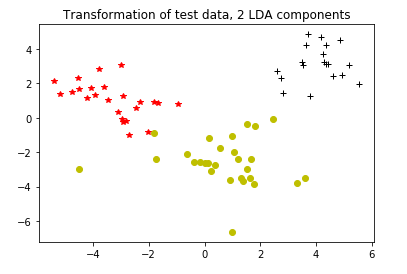

In [6]:
display(Image(filename='./LDA_pr.png'))

There should be no doubt that the LDA projection is much better at preserving the class structure.